In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1a) 
Classify the nine attributes as one or more (all that apply) of categorical, numeric, nominal, symmetric binary, asymmetric binary, ordinal, interval, and ratio. Provide justification.

1.Age--> numeric, ratio(division is possible, age zero makes sense,relative)
2.work-->categorical,nominal(+, - not possible, only comparisions)
3.edu--> categorical,nominal(+, - not possible, dropout can be from any level of edu)
4.marital-->categorical,nominal(no ordering, no one value is <= or >=)
5.occupation-->categorical,nominal(no ordering, no one value is <= or >=)
6.race--> categorical,nominal (+, - not possible,no ordering, no continuity)
7.sex-->categorical,nominal,symmetric binary(either male or female in this example,both of its states are of the same value and carry the same weight, and there is no preference as such as which outcome should be mapped to 0 or mapped to 1, outcomes are of equal importance ) 
8.hrs_per_week-->numeric,ratio (division is possible, age zero makes sense,relative)
9.income-->categorical,Ordinal,asymmetric Binary (relative discrete chunks,asymmetric binary attribute is one in which outcomes are not of equal importance )   

In [2]:
#1b) 
#Missing values in the data are marked with "?"
#(i) Load the data set. For each attribute, compute the percentage missing values.
df = pd.read_csv('censusData.csv')
for c in df:
    counts = df[c].value_counts().to_dict()
    for key,value in counts.items():
        if key=='?':
            percentage = float(value/df.shape[0]) * 100
            percentage=round(percentage,2)
            print("{} column has {}% missing values ".format(c,percentage))
#to replace ? with Nan
#df.replace('?',np.nan,inplace=True)
#nulls = pd.DataFrame(df.isna().sum())
#nulls.columns = ['Null Count']
#nulls.index.name = 'Feature'
#print(nulls)

work column has 5.64% missing values 
occupation column has 5.66% missing values 


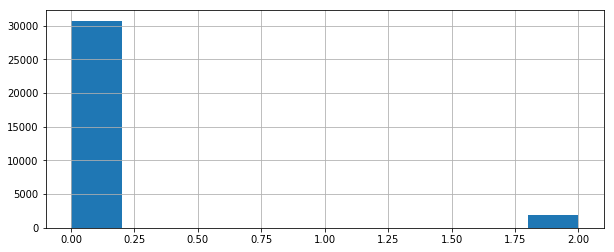

In [3]:
#1b(ii) Plot a histogram for the number of missing values per data point (row).(using matplotlib)

list={'?'}
df['missing']=df.isin(list).sum(1)
df['missing'].hist(figsize=(10, 4));

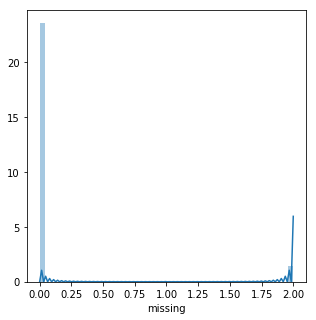

In [4]:
#1b(ii) Plot a histogram for the number of missing values per data point (row)(using seaborn)
plt.figure(figsize=(5,5))
sns.distplot(df['missing'])
plt.show()

describing age attribute: count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64 
describing hrs_per_week attribute: count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hrs_per_week, dtype: float64 
age mean value is 38.58164675532078 
hrs_per_week mean value is 40.437455852092995
age median value is 37.0
hrs_per_week median value is 40.0


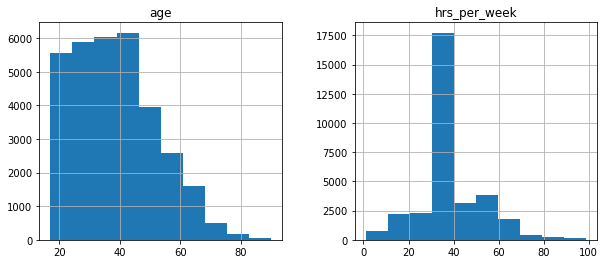

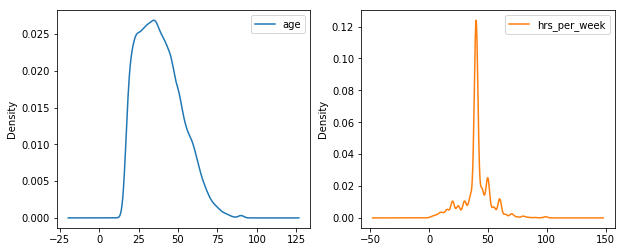

In [5]:
# 1 c)Numeric variables  
#(i) For each numeric variable, plot a histogram.


features = ['age', 'hrs_per_week']
df[features].hist(figsize=(10, 4));
print("describing age attribute: {} ".format(df['age'].describe()))
print("describing hrs_per_week attribute: {} ".format(df['hrs_per_week'].describe()))
print("age mean value is {} ".format(df['age'].mean()))
print("hrs_per_week mean value is {}".format(df['hrs_per_week'].mean()))
print("age median value is {}".format(df['age'].median()))
print("hrs_per_week median value is {}".format(df['hrs_per_week'].median()))
df[features].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4));

#1 c)Also compute their mean and median. What observations can you make from the histograms? 

Solution: age and hrs_per_week are the numeric variables.
1)age observation-> mean value is 38.58, median is 37.0. Atleast 50% of the people are between age 28 and 48 years old (indicated participants are of working age).ages are skewed towards right(tail is little longer on right side),Some Outliers  are also present.

2)hrs_per_week observation-> mean value is 40.43, median is 40.0. More people work 40 hours per day. There are some outliers.


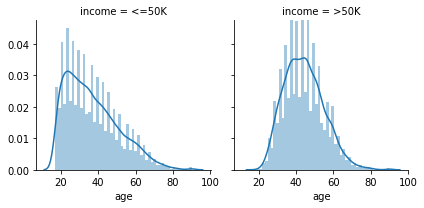

In [6]:
#1c(ii) For each numeric variable, plot two histograms (on the same scales, so they can be compared) 
#for the two values of income (<= 50K and > 50K). What observations can you make?
g = sns.FacetGrid(data=df,col='income')
g.map(sns.distplot,'age')

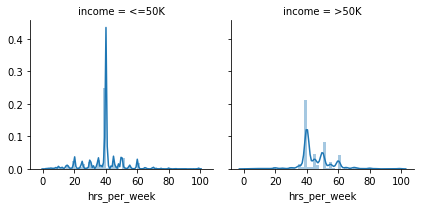

In [7]:
#c(ii) For each numeric variable, plot two histograms (on the same scales, so they can be compared) 
#for the two values of income (<= 50K and > 50K). What observations can you make?
g = sns.FacetGrid(data=df,col='income')
g.map(sns.distplot,'hrs_per_week')

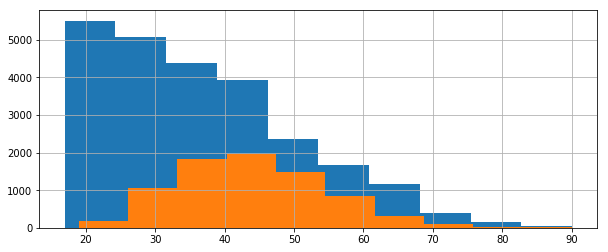

In [8]:
#C(ii)using matplotlib--optional accoring to age. Blue-income<=50, Orange-income>50
df['lessIncome'] = (df['income']=='<=50K')
df[df['lessIncome']==True]['age'].hist(figsize=(5, 4))
df[df['lessIncome']==False]['age'].hist(figsize=(10, 4))

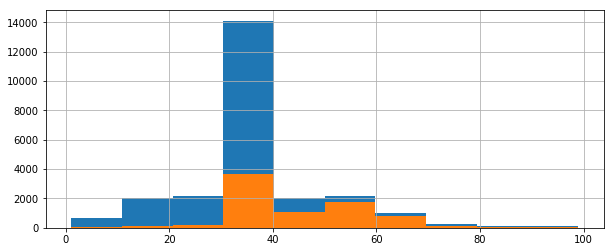

In [9]:
#C(ii) using matplotlib--optional HOurs per week. Blue-income<=50, Orange-income>50
df[df['lessIncome']==True]['hrs_per_week'].hist(figsize=(5, 4))
df[df['lessIncome']==False]['hrs_per_week'].hist(figsize=(10, 4))

#C(ii) Observations from histogram:
Histograms are better for numerical data.For plotting categorical vs Numerical variable , box plots are  better for analysis. 
1)age: Most people with income<=50k are of age around 20 and 50.  Skewed distribution.
Most people with income>50k are of age around 40.
The plot shows that People with higher(greater) age have higher income.

2)hrs_per_week:there are a number of outliers who work above  60 hours. MOre than 14,000 people work around 40 hours for income  income<=50k.  around 4000 people work around 40 hours for income  income<50k. 


          count       mean        std   min   25%   50%   75%   max
income                                                             
<=50K   24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
>50K     7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0
income
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64


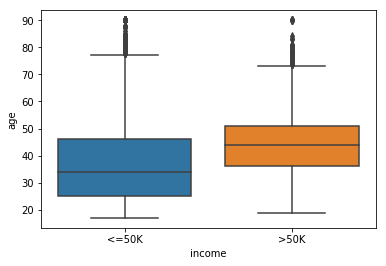

In [10]:
#C(iii) For each numeric variable, plot two boxplots side-by-side in the same plot for the two values of income. 
#How does this compare with (ii), in terms of the observations you can make?
#half of the data is distributed within the box
sns.boxplot(x='income', y='age', data=df)
print(df.groupby(['income'])['age'].describe())
print(df.groupby(['income'])['age'].mean())

C(iii) How does this compare with (ii), in terms of the observations you can make?

For plotting categorical vs Numerical variable , box plots are  better for analysis.the soild black line gives the median
value. We can analyse the interquartile range , meadian easily from boxplots. whiskers tell about the outliers.The filled black dots are the so-called outliers,
i.e. data points that fall below the lower whisker or above the upper whisker.The width of the box is equal to the IQR.
Histograms are better for numerical data.
1)Age-->Atleast 50% people  who take this survey with income<=50k are of age around 25 to 46 and Median  age is 34. 
IQR is bulkier comparetively. 
Atleast 50% people  who take this survey with income>50k are of average age 36 to 51 and Median is 44. Median age of people with income<=50k is less than median with income>50k.
People >50K a year are on average about 44-45 years old, whereas people who earn less than 50K a year, are younger on average are around 36-37 years old.

25th quartile of income<=50k is 25 and income>50k is 36. That means elder an individual higher is his chances of earning more.

          count       mean        std  min   25%   50%   75%   max
income                                                            
<=50K   24720.0  38.840210  12.318995  1.0  35.0  40.0  40.0  99.0
>50K     7841.0  45.473026  11.012971  1.0  40.0  40.0  50.0  99.0
income
<=50K    38.840210
>50K     45.473026
Name: hrs_per_week, dtype: float64


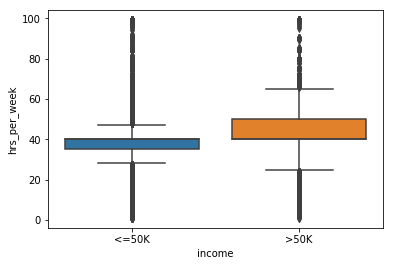

In [11]:
#C(iii)
sns.boxplot(x='income', y='hrs_per_week', data=df)
print(df.groupby(['income'])['hrs_per_week'].describe())
print(df.groupby(['income'])['hrs_per_week'].mean())

C(iii)How does this compare with (ii), in terms of the observations you can make?
2)Hrs_per_week-->
Mean number of working hours is greater for people woth income>50k.
Atleast 50% of  people with income<=50k work for 35 to 40 hours per week.  
Atleast 50% of  people with income>50k  work 40 to 50 hours per week and IQR is bulkier comparetively.
As income increases, number of hours per week also increases. 
Both medians are eqaul to 40 hours.
3rd quartile for income<=50k coincides with median.
there is a correlation between income and hours per week.

work has 7 unique values ['State-gov' 'Self-emp' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Not-Working']


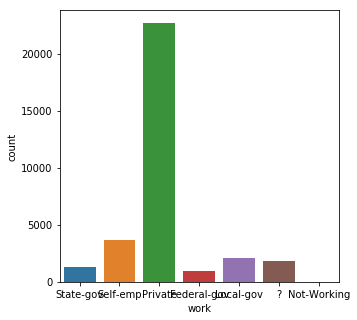

edu has 7 unique values ['Bachelors' 'HS-grad' 'Dropout' 'Masters' 'Associates' 'Doctorate'
 'Prof-school']


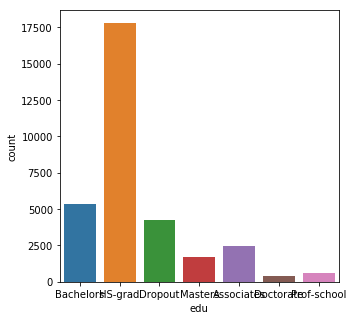

marital has 6 unique values ['Never-married' 'Married' 'Divorced' 'Married-spouse-absent' 'Separated'
 'Widowed']


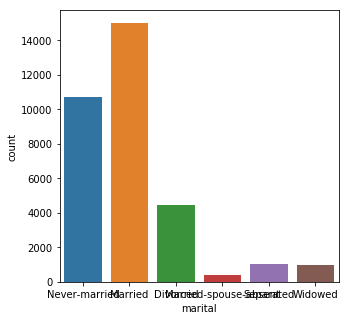

occupation has 9 unique values ['Admin' 'White-Collar' 'Blue-Collar' 'Professional' 'Service' 'Sales'
 'Other-Occupations' '?' 'Military']


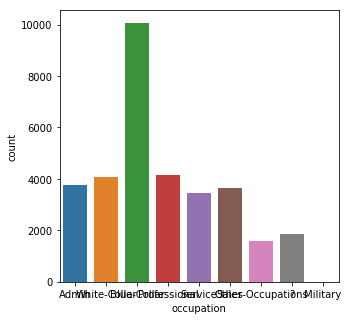

race has 5 unique values ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


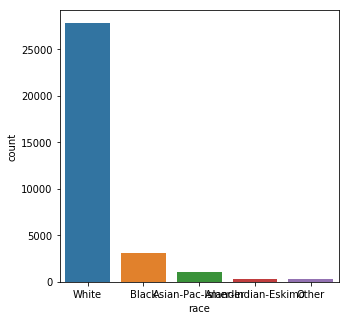

sex has 2 unique values ['Male' 'Female']


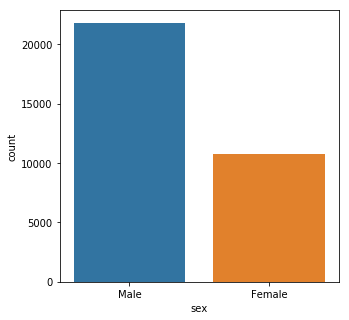

income has 2 unique values ['<=50K' '>50K']


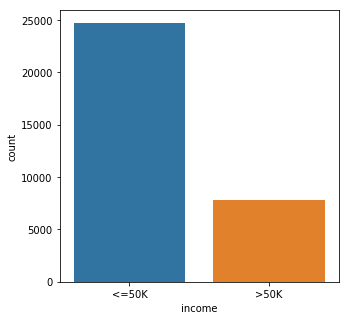

In [12]:
#d) (10 points) Categorical variables  
#(i) For each categorical variable, plot a bar plot with frequencies. How many unique values does each variable have? 

categorical=['work', 'edu', 'marital', 'occupation', 'race', 'sex', 'income']
for i, col in enumerate(categorical):
     plt.figure(figsize=(5,5))
     print("{} has {} unique values {}".format(col,len(df[col].unique().tolist()),df[col].unique()))
     sns.countplot(x=col, data=df)
     plt.figure(i)
     plt.show()


In [13]:
(df['work'].value_counts()/32561)*100

Private        69.703019
Self-emp       11.231228
Local-gov       6.427935
?               5.638647
State-gov       3.986364
Federal-gov     2.948312
Not-Working     0.064494
Name: work, dtype: float64

Observations:
Work-->There are no participants in the survey who never worked in their lifetime.(Not working is zero).69% of people work in Private sector. 
Income-->The graph above shows us the percentage of people earning less than 50K a year and more than 50K

In [14]:
(df['edu'].value_counts()/32561)*100

HS-grad        54.642056
Bachelors      16.446055
Dropout        13.061638
Associates      7.521268
Masters         5.291607
Prof-school     1.768987
Doctorate       1.268389
Name: edu, dtype: float64

Edu-->HS grads are  54% MAJORITY .

In [15]:
(df['marital'].value_counts()/32561)*100

Married                  46.064310
Never-married            32.809189
Divorced                 13.645158
Separated                 3.147938
Widowed                   3.049661
Married-spouse-absent     1.283744
Name: marital, dtype: float64

Married   are majority  46% percent.

In [16]:
(df['occupation'].value_counts()/32561)*100

Blue-Collar          30.901999
Professional         12.714597
White-Collar         12.487331
Admin                11.578268
Sales                11.209729
Service              10.577071
?                     5.660146
Other-Occupations     4.843217
Military              0.027640
Name: occupation, dtype: float64

Blue collar are majority 30%

In [17]:
(df['race'].value_counts()/32561)*100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

White people are majority 85%

In [18]:
(df['sex'].value_counts()/32561)*100

Male      66.920549
Female    33.079451
Name: sex, dtype: float64

Male people are majority

In [19]:
(df['income'].value_counts()/32561)*100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

75% people have income<=50K

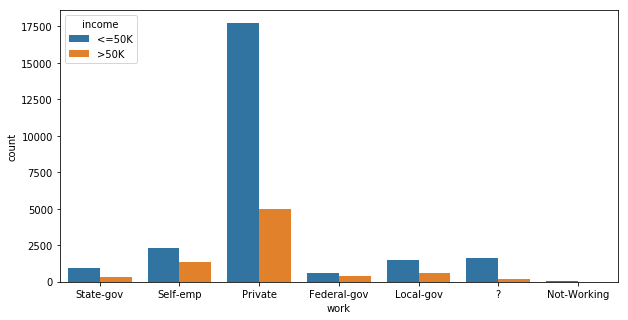

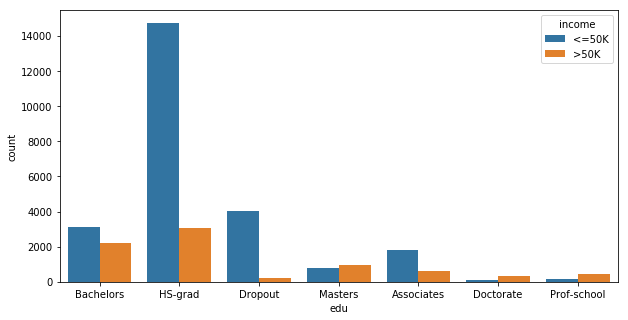

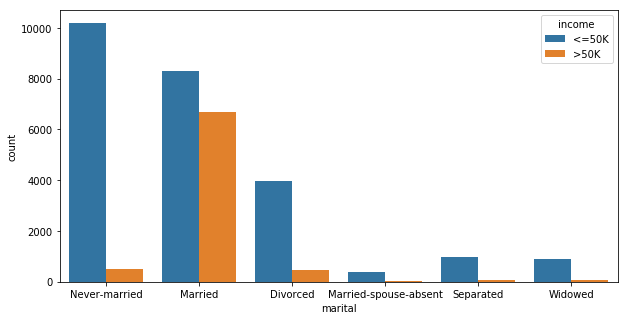

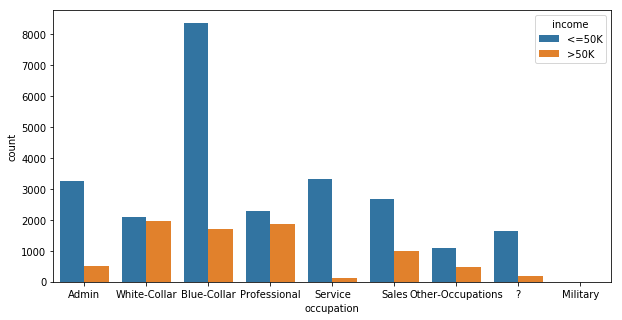

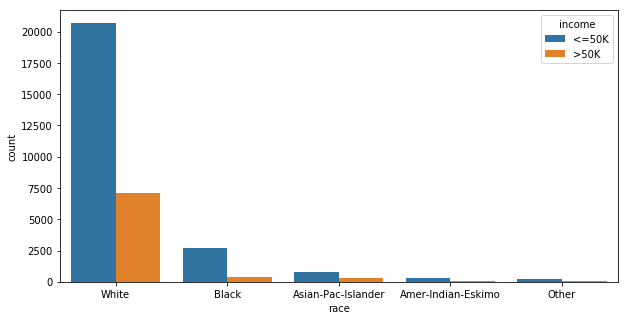

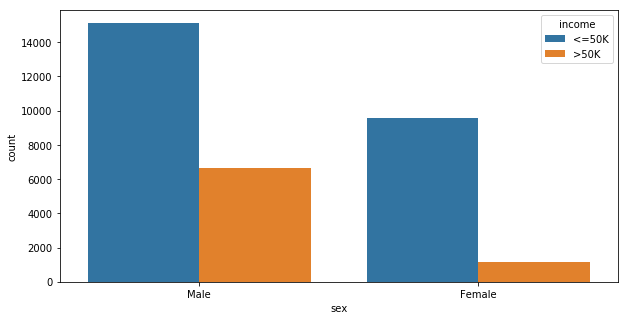

In [20]:
#d(ii) For each categorical variable, plot two bar plots (on the same scale) for the two values of income. 
#What observations can you make from these plots?
categorical2=['work', 'edu', 'marital', 'occupation', 'race', 'sex']
for i, col in enumerate(categorical2):
     plt.figure(figsize=(10,5))
     sns.countplot(x=col, hue='income', data=df);
     plt.figure(i)
     plt.show()

In [21]:
print((df.groupby(['income'])['work'].value_counts())/32561*100)
print("Income<=50K")
print((df[(df['income'] == '<=50K')]['work'].value_counts()/24720)*100)
print("Income>50K")
print((df[(df['income'] == '>50K')]['work'].value_counts()/7841)*100)

income  work       
<=50K   Private        54.460858
        Self-emp        7.097448
        ?               5.052056
        Local-gov       4.533030
        State-gov       2.902245
        Federal-gov     1.808913
        Not-Working     0.064494
>50K    Private        15.242161
        Self-emp        4.133780
        Local-gov       1.894905
        Federal-gov     1.139400
        State-gov       1.084119
        ?               0.586591
Name: work, dtype: float64
Income<=50K
Private        71.735437
Self-emp        9.348706
?               6.654531
Local-gov       5.970874
State-gov       3.822816
Federal-gov     2.382686
Not-Working     0.084951
Name: work, dtype: float64
Income>50K
Private        63.295498
Self-emp       17.166178
Local-gov       7.868894
Federal-gov     4.731539
State-gov       4.501977
?               2.435914
Name: work, dtype: float64


In  work, private comapnies employ a lot of people and have more people with income <=50k. Self employed people have more income>50k in percenatges.

In [22]:
print((df.groupby(['income'])['edu'].value_counts())/32561*100)
print("Income<=50K")
print((df[(df['income'] == '<=50K')]['edu'].value_counts()/24720)*100)
print("Income>50K")
print((df[(df['income'] == '>50K')]['edu'].value_counts()/7841)*100)
print(((df[(df['edu'] == 'HS-grad')]['income'].value_counts())/17792)*100)
print(((df[(df['edu'] == 'Bachelors')]['income'].value_counts())/5355)*100)
print(((df[(df['edu'] == 'Dropout')]['income'].value_counts())/4253)*100)
print(((df[(df['edu'] == 'Associates')]['income'].value_counts())/2449)*100)
print(((df[(df['edu'] == 'Masters')]['income'].value_counts())/1723)*100)
print(((df[(df['edu'] == 'Doctorate')]['income'].value_counts())/2449)*100)
print(((df[(df['edu'] == 'Prof-school')]['income'].value_counts())/576)*100)

income  edu        
<=50K   HS-grad        45.238168
        Dropout        12.312275
        Bachelors       9.625012
        Associates      5.598722
        Masters         2.346365
        Prof-school     0.469887
        Doctorate       0.328614
>50K    HS-grad         9.403888
        Bachelors       6.821044
        Masters         2.945241
        Associates      1.922545
        Prof-school     1.299100
        Doctorate       0.939775
        Dropout         0.749363
Name: edu, dtype: float64
Income<=50K
HS-grad        59.587379
Dropout        16.217638
Bachelors      12.677994
Associates      7.374595
Masters         3.090615
Prof-school     0.618932
Doctorate       0.432848
Name: edu, dtype: float64
Income>50K
HS-grad        39.051141
Bachelors      28.325469
Masters        12.230583
Associates      7.983676
Prof-school     5.394720
Doctorate       3.902563
Dropout         3.111848
Name: edu, dtype: float64
<=50K    82.790018
>50K     17.209982
Name: income, dtype: float64


In education, Masters,prof school,Doctorate  earn income>50k compared to people in that category.Most people are HS  grad with income <=50k.Prof-school makes the highjest percentage of income 73%. There is a relationship between education and income. 

In [23]:
print((df.groupby(['income'])['marital'].value_counts())/32561*100)
print("Income<=50K")
print((df[(df['income'] == '<=50K')]['marital'].value_counts()/24720)*100)
print("Income>50K")
print((df[(df['income'] == '>50K')]['marital'].value_counts()/7841)*100)

income  marital              
<=50K   Never-married            31.301250
        Married                  25.481404
        Divorced                 12.223212
        Separated                 2.945241
        Widowed                   2.788612
        Married-spouse-absent     1.179325
>50K    Married                  20.582906
        Never-married             1.507939
        Divorced                  1.421947
        Widowed                   0.261048
        Separated                 0.202696
        Married-spouse-absent     0.104419
Name: marital, dtype: float64
Income<=50K
Never-married            41.229773
Married                  33.563916
Divorced                 16.100324
Separated                 3.879450
Widowed                   3.673139
Married-spouse-absent     1.553398
Name: marital, dtype: float64
Income>50K
Married                  85.473792
Never-married             6.261956
Divorced                  5.904859
Widowed                   1.084045
Separated            

In [24]:
print((df.groupby(['income'])['race'].value_counts())/32561*100)
print("Income<=50K")
print((df[(df['income'] == '<=50K')]['race'].value_counts()/24720)*100)
print("Income>50K")
print((df[(df['income'] == '>50K')]['race'].value_counts()/7841)*100)

income  race              
<=50K   White                 63.569915
        Black                  8.405761
        Asian-Pac-Islander     2.343294
        Amer-Indian-Eskimo     0.844569
        Other                  0.755505
>50K    White                 21.857437
        Black                  1.188538
        Asian-Pac-Islander     0.847640
        Amer-Indian-Eskimo     0.110562
        Other                  0.076779
Name: race, dtype: float64
Income<=50K
White                 83.733819
Black                 11.072006
Asian-Pac-Islander     3.086570
Amer-Indian-Eskimo     1.112460
Other                  0.995146
Name: race, dtype: float64
Income>50K
White                 90.766484
Black                  4.935595
Asian-Pac-Islander     3.519959
Amer-Indian-Eskimo     0.459125
Other                  0.318837
Name: race, dtype: float64


In [25]:
print((df.groupby(['income'])['sex'].value_counts())/32561*100)
print("Income<=50K")
print((df[(df['income'] == '<=50K')]['sex'].value_counts()/24720)*100)
print("Income>50K")
print((df[(df['income'] == '>50K')]['sex'].value_counts()/7841)*100)
#print(df['sex'].value_counts())
print(((df[(df['sex'] == 'Male')]['income'].value_counts())/21790)*100)
print(((df[(df['sex'] == 'Female')]['income'].value_counts())/10771)*100)

income  sex   
<=50K   Male      46.460490
        Female    29.458555
>50K    Male      20.460060
        Female     3.620896
Name: sex, dtype: float64
Income<=50K
Male      61.197411
Female    38.802589
Name: sex, dtype: float64
Income>50K
Male      84.963653
Female    15.036347
Name: sex, dtype: float64
<=50K    69.426342
>50K     30.573658
Name: income, dtype: float64
<=50K    89.053941
>50K     10.946059
Name: income, dtype: float64


Maritial status--> married people are majority  have a fair share of income .

Occupation: Blue collar service  are majority with income <=50k.White collar jobs have alomost equal ratio of both incomes.

Race--> majority are white with <50k. 

sex--> 89% of females make  <=50K 
       69.4% of males make make  <=50K.

correlation coefficient between  age and hrs_per_week variables is 0.06875570750955741


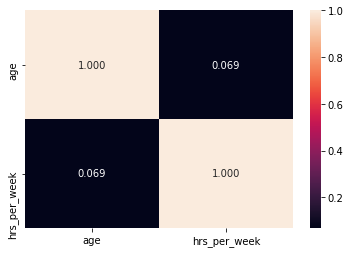

In [26]:
#e 1(i) Plot a scatter plot between "age" and "hrs_per_week". Is there any overplotting? If yes, try to fix it.
#Compute the correlation coefficient between these two variables.
#Based on the plot and the correlation coefficient, comment on the relationship between these two variables.
#corr between age and hrs_per_week
# Drop non-numerical variables
features = ['age', 'hrs_per_week']
# Calculate and plot
print("correlation coefficient between  age and hrs_per_week variables is",df['age'].corr(df['hrs_per_week']))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix,annot=True, fmt=".3f")

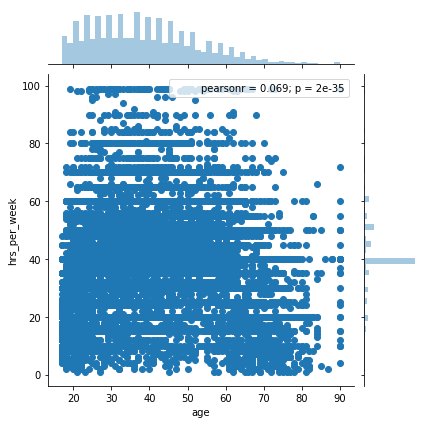

In [27]:
#e(i) Plot a scatter plot between "age" and "hrs_per_week". Is there any overplotting? If yes, try to fix it.  
#Compute the correlation coefficient between these two variables. 
#Based on the plot and the correlation coefficient, comment on the relationship between these two variables. 
plt.figure(figsize=(40,20))
sns.jointplot(x='age', y='hrs_per_week', data=df, kind='scatter');
plt.show()


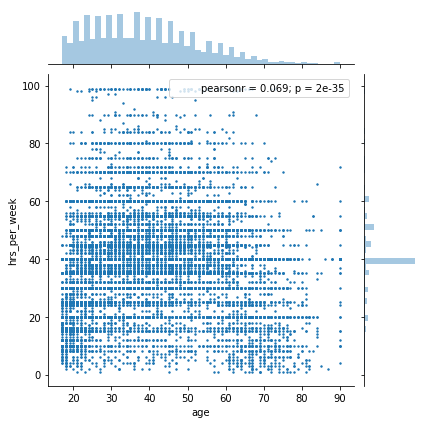

In [28]:
#rediced overplotting
plt.figure(figsize=(40,20))
sns.jointplot(x='age', y='hrs_per_week',s=2, data=df, kind='scatter');
plt.show()

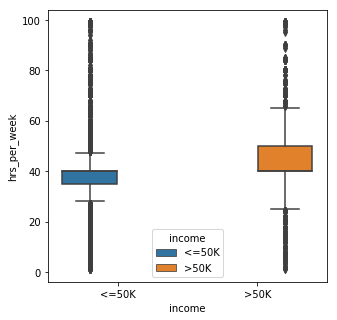

In [29]:
#e(ii) What relationship do you expect between income and number of hours worked? What does the data show?
plt.figure(figsize=(5,5))
sns.boxplot(x='income', y='hrs_per_week', data=df,hue='income')
plt.show()

In [30]:
df.groupby(['income'])['hrs_per_week'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,38.840210,12.318995,1.0,35.0,40.0,40.0,99.0
>50K,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0


Observation:Hrs_per_week-->
Mean number of working hours is greater for people woth income>50k.
Atleast 50% of  people with income<=50k work for 35 to 40 hours per week.  
Atleast 50% of  people with income>50k  work 40 to 50 hours per week and IQR is bulkier comparetively.
As income increases, number of hours per week also increases. 
Both medians are eqaul to 40 hours.
3rd quartile for income<=50k coincides with median.
there is a positive correlation between income and hours per week.

HS-grad        17792
Bachelors       5355
Dropout         4253
Associates      2449
Masters         1723
Prof-school      576
Doctorate        413
Name: edu, dtype: int64


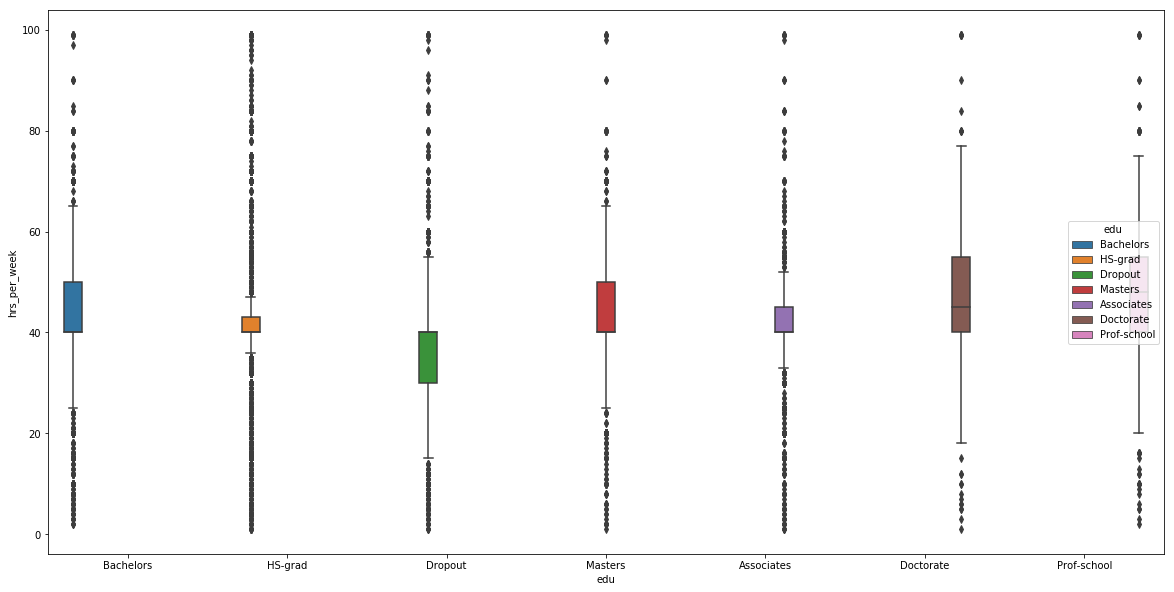

In [31]:
#e.(iii) What relationship do you expect between education and number of hours worked? What does the data show?
print(df['edu'].value_counts())
plt.figure(figsize=(20,10))
sns.boxplot(x='edu', y='hrs_per_week', data=df,hue='edu')
plt.show()


In [32]:
df.groupby(['edu'])['hrs_per_week'].describe()

,count,mean,std,min,25%,50%,75%,max
edu,,,,,,,,
Associates,2449.0,41.128624,11.436749,1.0,40.0,40.0,45.0,99.0
Bachelors,5355.0,42.614006,11.446185,2.0,40.0,40.0,50.0,99.0
Doctorate,413.0,46.973366,15.084447,1.0,40.0,45.0,55.0,99.0
Dropout,4253.0,36.717846,13.346435,1.0,30.0,40.0,40.0,99.0
HS-grad,17792.0,39.869267,11.969360,1.0,40.0,40.0,43.0,99.0
Masters,1723.0,43.836332,12.277801,1.0,40.0,40.0,50.0,99.0
Prof-school,576.0,47.425347,14.806038,2.0,40.0,48.0,55.0,99.0


Obervation:
Majority are HS grads.
For skewed distribution mean would be outside the box. 
Prof-School works for highest number of hours.  Atleast 50% prof works for 40 to 55 hours.As education increases mean number of  hrs_per_wek also increases. 